In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

# read CSVs
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

# merge on movieId column
data = pd.merge(left=movies, right=ratings, on='movieId')

# Data ingestion

In [3]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [4]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [5]:
data.shape

(20000263, 6)

### Counting unique movies

In [6]:
data.movieId.nunique()

26744

### Exploring Movie Publish Years

In [7]:
years = []

for title in data['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
        
data['moviePubYear'] = years
print(len(data[data['moviePubYear'] == 9999]))

1222


In [8]:
# data[data.moviePubYear==9999].shape
data.moviePubYear.nunique()

119

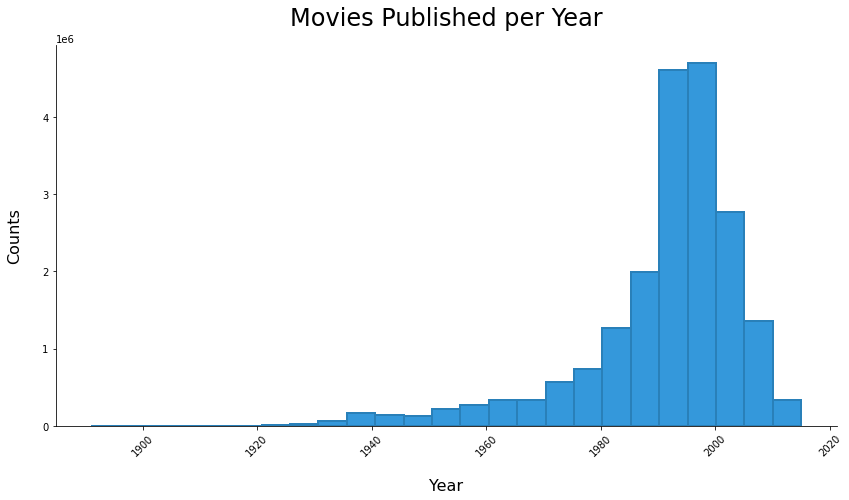

In [9]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

### Rating exploration

In [10]:
data.rating.value_counts(dropna=False)
# data.rating.nunique()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

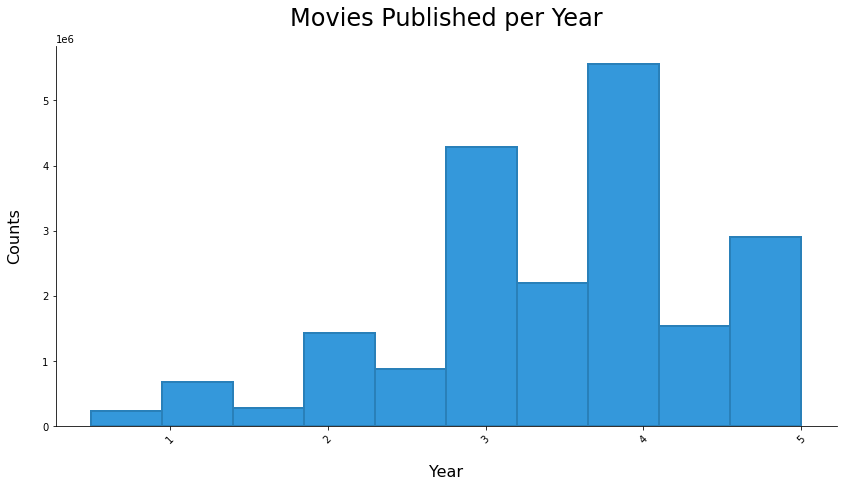

In [11]:
def make_histogram(dataset, attribute, bins=10, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'rating':
        dataset = dataset[dataset['rating'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'rating', title='Movies Published per Year', xlab='Year', ylab='Counts')

### Movie genre exploration

In [12]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

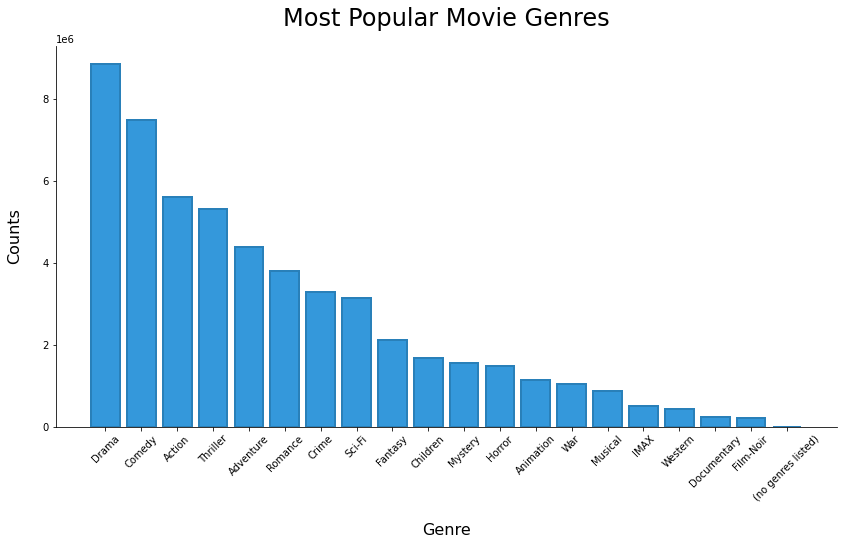

In [13]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    
make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts')

### Average Rating by Genre

In [ ]:
values = defaultdict(list)
for ind, row in data.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
        
        
genre_lst, rating_lst = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_lst.append(key)
        rating_lst.append(np.mean(item))
        
        
genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T
genres_with_ratings.columns = ['Genre', 'Mean_Rating']

### Visualizing the Number of Ratings

In [ ]:
num_ratings = pd.DataFrame(data.groupby('movieId').count()['rating']).reset_index()
data = pd.merge(left=data, right=num_ratings, on='movieId')
data.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

Top ten movies according to the number of ratings

In [ ]:
data.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
1943833,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,9119,3.0,1195975437,1994,67310
2501947,356,Forrest Gump (1994),Comedy|Drama|Romance|War,92433,1.0,1000434094,1994,66172
2165247,318,"Shawshank Redemption, The (1994)",Crime|Drama,78857,4.0,1373062716,1994,63366
4018298,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,12543,3.0,853528866,1991,63299
3248218,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,98991,2.0,1076185028,1993,59715
1731011,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,96068,4.0,860575197,1977,54502
860828,110,Braveheart (1995),Action|Drama|War,64098,3.0,1111486448,1995,53769
3885703,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,41373,4.0,1235639373,1991,52244
11050482,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,92362,5.0,1000170062,1999,51334
3492060,527,Schindler's List (1993),Drama|War,33967,5.0,1011409193,1993,50054


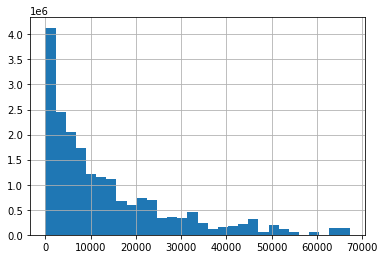

In [ ]:
data.numRatings.hist(bins=30)

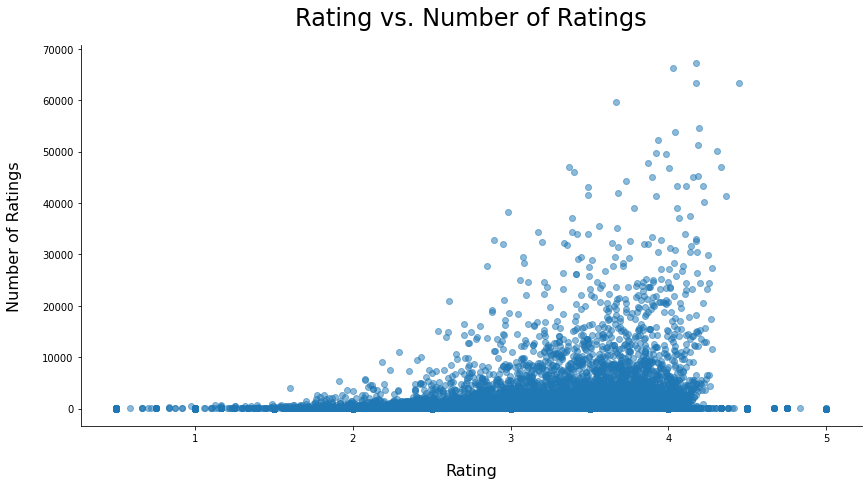

In [ ]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = data.groupby('title')['rating'].mean().values
ratings_df['Num_Ratings'] = data.groupby('title')['rating'].count().values


fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5)